<h1 p align='center'>Previsão de variáveis alvo contínuas com a Análise de Regressão</h1>
<p align='center'><img src=https://cdn.lynda.com/course/2848256/2848256-1608664963973-16x9.jpg width = 500></p>

Modelos de regressão são usados para prever variáveis alvo em escala contínua, o que os torna atraentes para abordar muitas questões da ciência. Eles também têm aplicações na indústria, como entender as relações entre variáveis, avaliar tendências ou fazer previsões. Um exemplo é prever as vendas de uma empresa nos próximos meses.

\begin{align*}
y = x_{0} + w_{1}x
\end{align*}

Aqui, o peso, $w_{0}$, representa a interseção do eixo $y$ e $w_{1}$ é o coeficiente de peso da variável explicativa. Nosso objetivo é aprender os pesos da equação linear para descrever a relação entre a variável explicativa e a variável alvo, que pode então ser usada para prever as respostas de novas variáveis explicativas que não faziam parte do conjunto de dados de treinamento.

Com base na equação linear que definimos anteriormente, a regressão linear pode ser entendida como encontrar a linha reta de melhor ajuste por meio dos exemplos de treinamento, conforme mostrado na figura a seguir:

<p align='center'><img src=https://vitalflux.com/wp-content/uploads/2022/02/simple-linear-regression-line.jpg></p>

Essa linha de melhor ajuste também é chamada de **linha de regressão**, e as linhas verticais da linha de regressão para os exemplos de treinamento são os chamados deslocamentos ou resíduos – os erros de nossa previsão.

### Regressão linear múltipla

Acima foi introduzida a regressão linear simples, um caso especial de regressão linear com uma variável explicativa. Claro, também podemos generalizar o modelo de regressão linear para múltiplas variáveis explicativas; esse processo é chamado de regressão linear múltipla:
\begin{align*}
y = x_{0}w_{0} + w_{1}x_{1} + ... w_{m}x_{m} = \sum^{n}_{i=0}w_{i}x_{i} = w^Tx
\end{align*}

<img src=https://datacadamia.com/_media/data_mining/multiple_regression_representation_hyperplane.jpg? width='500'>

Figura 1: Hiperplano com duas *features*

Como podemos ver, as visualizações de múltiplos hiperplanos de regressão linear em um gráfico de dispersão tridimensional já são difíceis de interpretar ao olhar para figuras estáticas. Como não temos bons meios de visualizar hiperplanos com duas dimensões em um gráfico de dispersão (múltiplos modelos de regressão linear ajustados a conjuntos de dados com três ou mais recursos), os exemplos e visualizações se concentrarão, principalmente, no caso univariado, usando regressão linear simples. No entanto, as regressões lineares simples e múltiplas são baseadas nos mesmos conceitos e nas mesmas técnicas de avaliação; as implementações de código que discutiremos também são compatíveis com os dois tipos de modelo de regressão.

### Carregando o conjunto de dados de Habitação em um *DataFrame*

In [58]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Visualizando as características importantes de um conjunto de dados

A análise exploratória de dados (*EDA*) é uma primeira etapa importante e recomendada antes do treinamento de um modelo de aprendizado de máquina. Usaremos algumas técnicas simples, porém úteis, da caixa de ferramentas gráfica *EDA* que podem nos ajudar a detectar visualmente a presença de *outliers*, a distribuição dos dados e os relacionamentos entre os recursos.
Primeiro, criaremos uma matriz de gráfico de dispersão que nos permitirá visualizar as correlações em pares entre os diferentes recursos desse conjunto de dados em um só lugar. Para plotar a matriz de gráfico de dispersão, usaremos a função `scatterplotmatrix` da biblioteca *MLxtend*, que é uma biblioteca *Python* que contém várias funções de conveniência para aplicativos de aprendizado de máquina e ciência de dados em *Python*.

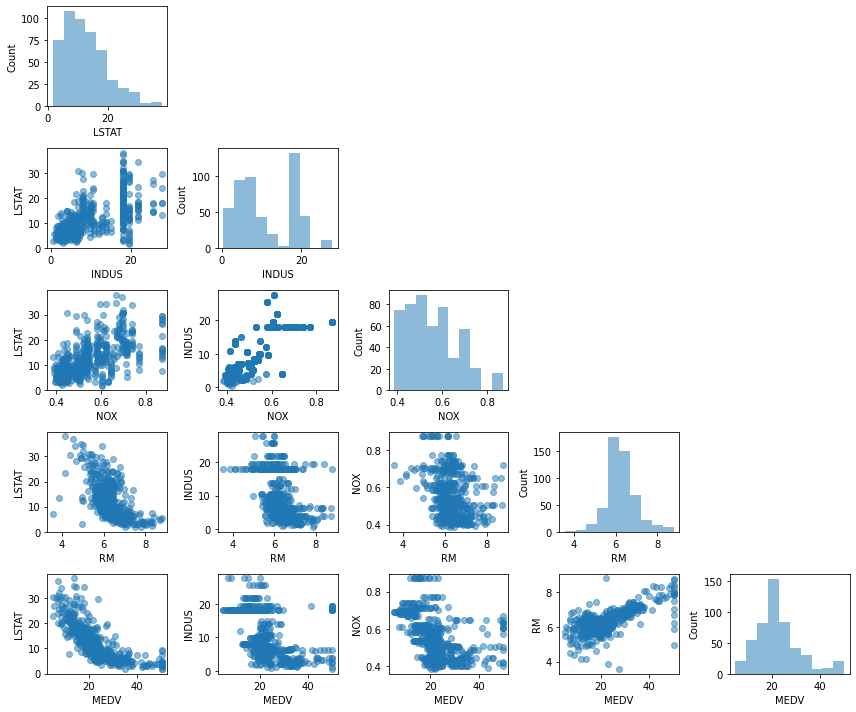

In [59]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix # Usando a Mlxtend para plotagem dos Gráficos

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']


scatterplotmatrix(df[cols].values, figsize=(12, 10), 
                  names=cols, alpha=0.5)

plt.tight_layout()

plt.show()


Para não deixar muito poluído o espaço, plotamos apenas **cinco colunas** do conjunto de dados: *LSTAT, INDUS, NOX, RM e MEDV*. No entanto, é interessante criar uma matriz de gráfico de dispersão de todo o *DataFrame* para explorar ainda mais o conjunto de dados escolhendo nomes de coluna diferentes na chamada de função de matriz de dispersão anterior ou incluindo todas as variáveis na matriz de gráfico de dispersão omitindo o seletor de coluna.

Usando essa matriz de gráfico de dispersão, agora podemos observar rapidamente como os dados são distribuídos e se eles contêm valores discrepantes. Por exemplo, podemos ver que existe uma relação linear entre o *RM* e os preços das casas, *MEDV* (a quinta linha da quarta coluna). Além disso, podemos ver no histograma - o subtrama inferior direito na matriz do gráfico de dispersão - que a variável *MEDV* parece ser normalmente distribuída, mas contém vários valores discrepantes.

<blockquote>
<h5>Suposição de normalidade da regressão linear</h5>
<p align='justify'>Observe que, ao contrário da crença comum, treinar um modelo de regressão linear não requer que as variáveis explicativas ou alvo sejam normalmente distribuídas. A suposição de normalidade é apenas um requisito para certas estatísticas e testes de hipóteses (para obter mais informações sobre este tópico, consulte Introdução à Análise de Regressão Linear, Montgomery, Douglas C. Montgomery, Elizabeth A. Peck, e G. Geoffrey Vining, Wiley, 2012, páginas: 318-319).</p>
</blockquote>

### Olhando para os relacionamentos usando uma matriz de correlação
Visualizamos anteriomente as distribuições de dados das variáveis ​​do conjunto de dados de Habitação na forma de histogramas e gráficos de dispersão. Em seguida, criaremos **uma matriz de correlação** para quantificar e resumir as relações lineares entre as variáveis. Uma matriz de correlação está intimamente relacionada à matriz de covariância quando aplicamos a redução de dimensionalidade não supervisionada por meio da Análise de Componentes Principais. Podemos interpretar a matriz de correlação como sendo uma versão redimensionada da matriz de covariância. De fato, a matriz de correlação é idêntica a uma matriz de covariância calculada a partir de características padronizadas.

A matriz de correlação é uma matriz quadrada que contém o coeficiente de correlação produto-momento de *Pearson* (geralmente abreviado como $r$ de *Pearson*), que mede a dependência linear entre pares de recursos. Os coeficientes de correlação estão na faixa de –1 a 1. Duas características têm uma correlação positiva perfeita se $r$ = 1, nenhuma correlação se $r$ = 0 e uma correlação negativa perfeita se $r$ = –1. Como mencionado anteriormente, o coeficiente de correlação de *Pearson* pode ser simplesmente calculado como a covariância entre duas características, $x$ e $y$ (numerador), dividida pelo produto de seus desvios padrão (denominador):

\begin{align*}
r = \dfrac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}
\end{align*} 

Como você pode ver na figura abaixo, a matriz de correlação nos fornece outro gráfico de resumo útil que pode nos ajudar a selecionar recursos com base em suas respectivas correlações lineares:

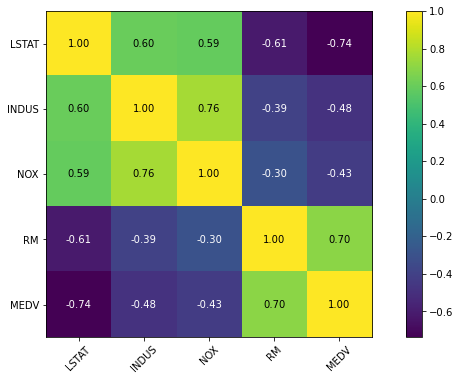

In [60]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, figsize=(12,6))
plt.show()

Para ajustar um modelo de regressão linear, estamos interessados naqueles recursos que têm **uma alta correlação com nossa variável alvo**, *MEDV*. Observando a matriz de correlação anterior, podemos ver que nossa variável alvo, *MEDV*, apresenta a maior correlação com a *variável LSTAT (-0,74)*; no entanto, ao inspecionar a matriz do gráfico de dispersão, há uma relação não linear clara entre *LSTAT* e *MEDV*.

Por outro lado, a correlação entre *RM* e *MEDV* também é relativamente **alta (0,70)**. Dada a relação linear entre essas duas variáveis que observamos no gráfico de dispersão, *RM* parece ser uma boa escolha como variável exploratória para introduzir os conceitos de um modelo de regressão linear simples.

### Implementando um modelo de regressão linear de mínimos quadrados comum
Mencionamos que a regressão linear pode ser entendida como a obtenção da linha reta de melhor ajuste através dos exemplos de nossos dados de treinamento. No entanto, não definimos o termo melhor ajuste nem discutimos as diferentes técnicas de ajuste de tal modelo. Agora, nesta oportunidade, preencheremos as peças que faltam neste quebra-cabeça usando o método dos mínimos quadrados ordinários (OLS) (às vezes também chamado de **mínimos quadrados lineares**) para estimar os parâmetros da linha de regressão linear que minimiza a soma das distâncias verticais quadradas (resíduos ou erros) aos exemplos de treinamento.

### Resolvendo a regressão para parâmetros de regressão com *Gradiente Descent*
Considere a implementação do Neurônio Linear Adaptativo (*Adaline*), em que o neurônio artificial utiliza uma função de ativação linear. Além disso, definimos uma função de custo, $J(w)$, que minimizamos para aprender os pesos por meio de algoritmos de otimização, como *Gradiente Descent* (GD) e *Gradiente Descent* estocástico (SGD).
Esta função de custo em *Adaline* é a soma dos erros ao quadrado (SSE), que é idêntica à função de custo que usamos para OLS:

$$
\text{$J(w) = \dfrac{1}{2} \sum^{n}_{i=1}(y^{(i)} -\hat{y}^{(i)})^{2} \quad \:onde \: \hat{y} \:$ é o valor predito $\: \hat{y} = w^Tx$}
$$



Iteration: 20/20 | Cost 130.67 | Elapsed: 0:00:00 | ETA: 0:00:000

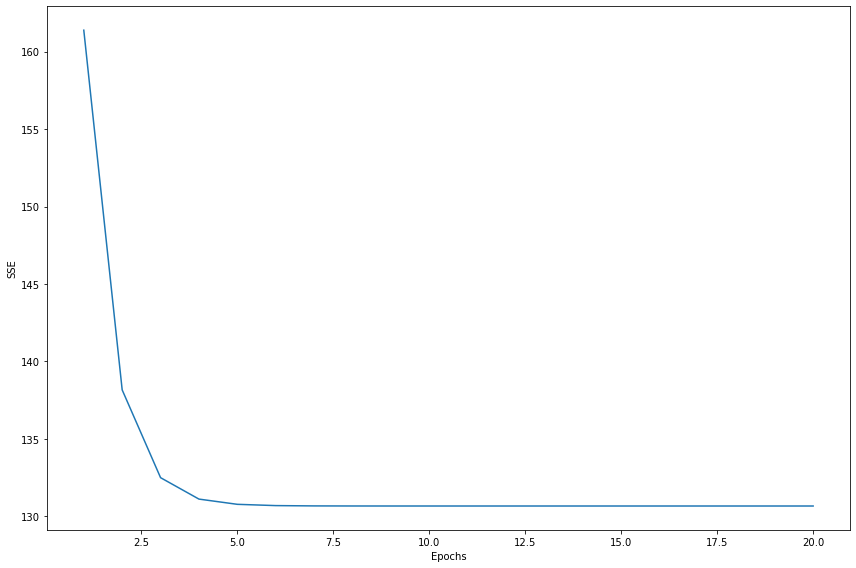

In [61]:
X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()


from mlxtend.regressor import LinearRegression
lr = LinearRegression(method= 'sgd', eta=0.001, epochs=20, print_progress=3, minibatches=1)
lr.fit(X_std,y_std)


plt.figure(figsize=(12,8))
plt.plot(range(1, lr.epochs+1), lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.tight_layout()
plt.show()    

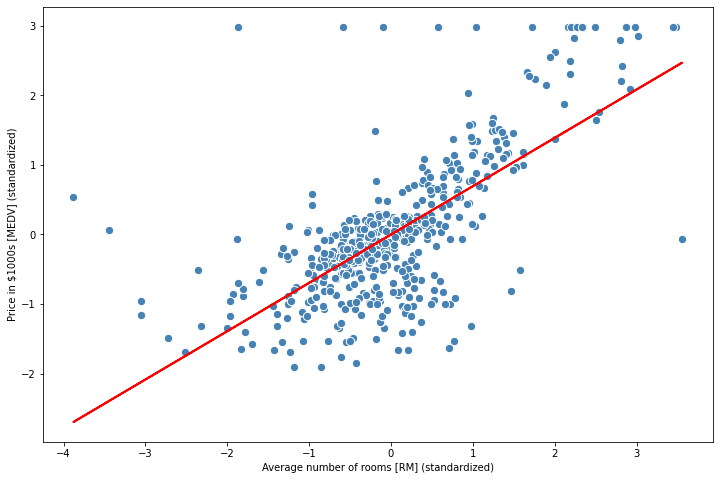

In [62]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='red', lw=2)    
    return 

plt.figure(figsize=(12,8))
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

Embora esta observação faça sentido, os dados também nos dizem que o número de quartos não explica muito bem os preços das casas em muitos casos. Mais adiante, discutiremos como quantificar o desempenho de um modelo de regressão. Curiosamente, também podemos observar que vários pontos de dados se alinharam em $y$ = 3, **o que sugere que os preços podem ter sido cortados**. Em certas aplicações, também pode ser importante relatar as variáveis de resultado previstas em sua escala original. Para dimensionar o resultado do preço previsto de volta ao eixo *Price in $1000s*, podemos simplesmente aplicar o método `inverse_transform` do *StandardScaler*:

In [63]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" %  sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


Neste exemplo de código, usamos o modelo de regressão linear previamente treinado para prever o preço de uma casa com **cinco** cômodos. De acordo com nosso modelo, tal casa valerá $ 10.840.

Vale a pena mencionar que tecnicamente não precisamos atualizar os pesos do *intercept* se estivermos trabalhando com variáveis padronizadas, pois o *intercept* do eixo $y$ é sempre 0 nesses casos. Podemos confirmar isso rapidamente imprimindo os pesos:

In [66]:
print('Slope: %.3f' % lr.w_[0])


Slope: 0.695


### Estimando o coeficiente de um modelo de regressão via *scikit-learn*

Implementamos um modelo de trabalho para análise de regressão; no entanto, em uma aplicação do mundo real, podemos estar interessados em implementações mais eficientes. Por exemplo, muitos dos estimadores do *scikit-learn* para regressão fazem uso da implementação de mínimos quadrados no SciPy (scipy.linalg.lstsq), que por sua vez usa otimizações de código altamente otimizadas baseadas no Linear Algebra Package (LAPACK). A implementação de regressão linear no *scikit-learn* também funciona (melhor) com variáveis não padronizadas, pois não usa otimização baseada em (S)GD, então podemos pular a etapa de padronização:

In [68]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


Como você pode ver ao executar este código, o modelo *LinearRegression* do *scikit-learn*, ajustado com as variáveis **RM** e **MEDV** não padronizadas, produziu coeficientes de modelo diferentes, uma vez que os recursos não foram padronizados. No entanto, quando comparamos com nossa implementação GD plotando **MEDV** contra **RM**, podemos ver qualitativamente que ele se ajusta aos dados da mesma forma.

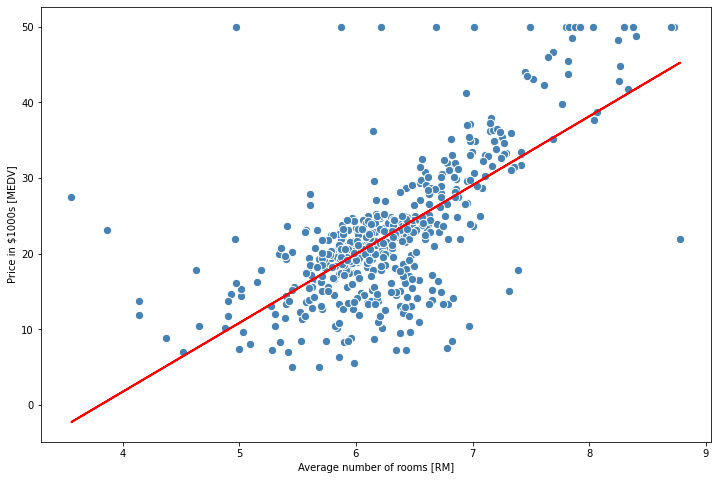

In [71]:
plt.figure(figsize=(12,8))
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Ajustando um modelo de regressão robusto usando RANSAC

Modelos de regressão linear podem ser fortemente impactados pela presença de *outliers*. Em certas situações, um subconjunto muito pequeno de nossos dados pode ter um grande efeito nos coeficientes estimados do modelo. Existem muitos testes estatísticos que podem ser usados ​​para detectar discrepâncias, que não serão abordadas neste momento. No entanto, remover *outliers* sempre requer nosso próprio julgamento como cientistas de dados, bem como nosso conhecimento de domínio.
Como alternativa para eliminar *outliers*, veremos um método robusto de regressão usando o algoritmo *RANdom SAmple Consensus (RANSAC)*, que ajusta um modelo de regressão a um subconjunto dos dados, os chamados *inliers*.
Podemos resumir o algoritmo iterativo *RANSAC* da seguinte forma:
1. Selecione um número aleatório de exemplos para serem *inliers* e ajuste o modelo.
2. Teste todos os outros pontos de dados em relação ao modelo ajustado e adicione os pontos que estão dentro de uma tolerância dada pelo usuário aos *inliers*.
3. Reinstale o modelo usando todos os *inliers*.
4. Estime o erro do modelo ajustado versus os *inliers*.
5. Encerre o algoritmo se o desempenho atingir um determinado limite definido pelo usuário ou se um número fixo de iterações for atingido; volte ao passo 1 caso contrário.

Vamos agora usar um modelo linear em combinação com o algoritmo *RANSAC* implementado na classe `RANSACRegressor` do *scikit-learn*:

In [79]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100,         # Define o máximo de interações: 100
                         min_samples=50,         # Define o mínimo de exemplos de treinamento escolhidos aleatoriamente.
                         loss='absolute_loss',   # Calcula distâncias verticais absolutas entre a linha ajustada e os exemplos de treinamento.
                         residual_threshold=5.0, # Só permitimos que exemplos de treinamento sejam incluídos no conjunto interno se sua distância vertical 
                                                 # à linha ajustada estiver dentro de 5 unidades de distância.
                         
                         random_state=0)

ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

Por padrão, o *scikit-learn* usa a estimativa *MAD* para selecionar o limiar *inlier*, onde *MAD* representa o desvio absoluto mediano dos valores alvo, $y$. No entanto, a escolha de um valor apropriado para o limiar *inlier* é específico do problema, o que é uma desvantagem do *RANSAC*. Muitas abordagens diferentes foram desenvolvidas nos últimos anos para selecionar automaticamente um bom limiar interno. Uma vez que ajustamos o modelo *RANSAC*, vamos obter os *inliers* e *outliers* do modelo de regressão linear *RANSAC* ajustado e plotá-los junto com o ajuste linear:

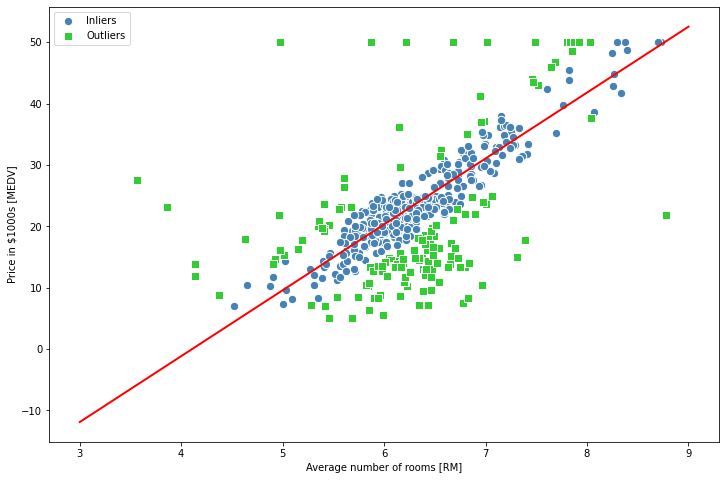

In [82]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers',s=70 )
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers', s=70 )
            
plt.plot(line_X, line_y_ransac, color='red', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

Quando imprimimos a inclinação e a interceptação do modelo executando o seguinte código, a linha de regressão linear será ligeiramente diferente do ajuste que obtivemos anteriomente sem usar *RANSAC*:

In [83]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


Usando o *RANSAC*, reduzimos o efeito potencial dos *outliers* neste conjunto de dados, mas não sabemos se essa abordagem terá um efeito positivo no desempenho preditivo para dados não vistos ou não. Assim, veremos diferentes abordagens para avaliar um modelo de regressão, que é uma parte crucial da construção de sistemas para modelagem preditiva.

### Avaliando o desempenho de modelos de regressão linear
Na seção anterior, você aprendeu como ajustar um modelo de regressão em dados de treinamento. No entanto, sabemos que é crucial testar o modelo em dados que não foram vistos durante o treinamento para obter uma estimativa mais imparcial de seu desempenho de generalização.

Queremos dividir nosso conjunto de dados em conjuntos de dados de treinamento e teste separados, onde usaremos o primeiro para ajustar o modelo e o último para avaliar seu desempenho em dados não vistos para estimar o desempenho da generalização. Em vez de prosseguir com o modelo de regressão simples, agora usaremos todas as variáveis no conjunto de dados e treinaremos um modelo de regressão múltipla:

In [86]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Instanciando o algoritmo
slr = LinearRegression()

# Treinando o modelo
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Como nosso modelo usa múltiplas variáveis explicativas, <u>não podemos visualizar a linha de regressão linear (ou hiperplano, para ser preciso)</u> em um gráfico bidimensional, mas podemos plotar os resíduos (as diferenças ou distâncias verticais entre os valores reais e previstos) versus os valores previstos para diagnosticar nosso modelo de regressão.

Os gráficos residuais são uma ferramenta gráfica comumente usada para diagnosticar modelos de regressão. Eles podem ajudar a detectar não linearidade e *outliers* e verificar se os erros são distribuídos aleatoriamente.
Usando o código a seguir, agora vamos traçar um gráfico de resíduos onde simplesmente subtraímos as verdadeiras variáveis de destino de nossas respostas previstas:

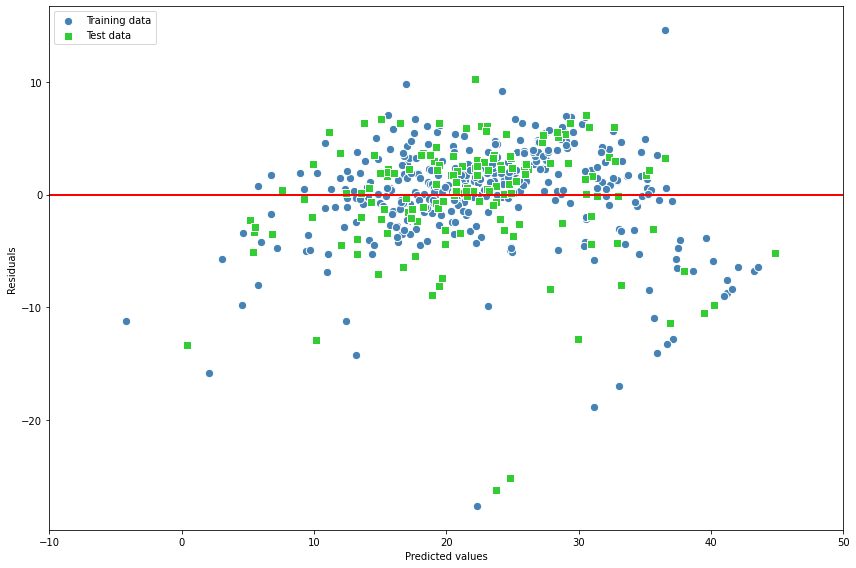

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data', s= 70)
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data', s= 70)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='red', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [145]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from IPython.display import display, Latex
display(Latex(f"$MSE \: train$: {mean_squared_error(y_train, y_train_pred):.3f}% $\quad -  \quad test$: {mean_squared_error(y_test, y_test_pred):.3f}%"))  

<IPython.core.display.Latex object>

Você pode ver que o *MSE* no conjunto de dados de treinamento é **19,96** e o *​​MSE* no conjunto de dados de teste é muito maior, com um valor de **27,20**, que é um indicador de que nosso modelo está <u>superajustando os dados de treinamento nesse caso</u>.

No entanto, esteja ciente de que o *MSE* é ilimitado em contraste com a precisão da classificação, por exemplo. Em outras palavras, a interpretação do *MSE* depende do conjunto de dados e do dimensionamento de recursos. Por exemplo, se os preços das casas fossem apresentados como múltiplos de 1.000 (com o sufixo K), o mesmo modelo produziria um *MSE* menor em comparação com um modelo que trabalhasse com recursos não dimensionados. Para ilustrar melhor este ponto:

$$
\text{$(\$10K − \$15K)^2 $\quad<\quad$ (\$10.000 − \$15.000)^2$}
$$

Assim, às vezes pode ser mais útil relatar o coeficiente de determinação ($R^{2}$ ), que pode ser entendido como uma versão padronizada do *MSE*, para melhor interpretabilidade do desempenho do modelo. Ou, em outras palavras, $R^{2}$ é a fração da variância da resposta que é capturada pelo modelo. O valor de $R^{2}$ é definido como:
\begin{align*}
R^{2} = 1 - \dfrac{SSE}{SST}
\end{align*} 



In [146]:
display(Latex(f"$R^2 \: train$: {r2_score(y_train, y_train_pred):.3f}%  $\quad -  \qquad test$: {r2_score(y_test, y_test_pred):.3f}%")) 

<IPython.core.display.Latex object>